In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC
import cv2
import pywt
from skimage.feature import local_binary_pattern, greycomatrix,greycoprops,hog
from skimage.filters import gabor
from sklearn import metrics
from sklearn.metrics import confusion_matrix,roc_curve,classification_report
import numpy as np

In [2]:
df=pd.read_csv("features_sobel.csv")

In [3]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,outcome
0,0.833109,0.629959,1330.770482,5.435445,0.911339,0.866902,0.706092,0.853820,0.600194,with helmet
1,0.646778,1.186019,3469.867080,14.089724,0.797289,0.700250,0.677552,0.664383,1.216035,with helmet
2,0.831406,0.635850,1374.087168,5.602657,0.910827,0.866271,0.713455,0.850816,0.609420,with helmet
3,0.687416,1.059341,4049.041303,16.296078,0.816658,0.735684,0.616097,0.668177,1.208116,with helmet
4,0.844691,0.593352,1579.903634,6.391591,0.916360,0.876740,0.643076,0.848103,0.620353,with helmet


In [4]:
l=LabelEncoder()

In [5]:
df["outcome"]=l.fit_transform(df.outcome)

In [6]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,outcome
0,0.833109,0.629959,1330.770482,5.435445,0.911339,0.866902,0.706092,0.853820,0.600194,0
1,0.646778,1.186019,3469.867080,14.089724,0.797289,0.700250,0.677552,0.664383,1.216035,0
2,0.831406,0.635850,1374.087168,5.602657,0.910827,0.866271,0.713455,0.850816,0.609420,0
3,0.687416,1.059341,4049.041303,16.296078,0.816658,0.735684,0.616097,0.668177,1.208116,0
4,0.844691,0.593352,1579.903634,6.391591,0.916360,0.876740,0.643076,0.848103,0.620353,0


In [9]:
x = df.drop(['outcome'], axis='columns')
y = df.outcome

In [10]:
scalar = StandardScaler()
x = scalar.fit_transform(x)

In [11]:
x_train, x_test, y_train,y_test=train_test_split(x,y,test_size=.2, random_state=2)

In [12]:
print(x_train.shape,y_train.shape, x_test.shape, y_test.shape)

(98, 9) (98,) (25, 9) (25,)


In [13]:
img=cv2.imread(r"C:\Users\user\Desktop\MCA\SEM 3\Project\programs\test_without_bg\hog\without\crop_head1.jpg")  
#img=cv2.imread(r"C:\Users\user\Desktop\MCA\SEM 3\Project\programs\test_without_bg\hog\with\crop_head46.jpg")
#cv2.imshow("org img",img)
#cv2.waitKey(0)

In [14]:
img1= cv2.resize(img, (400,400))
c=cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
    
    #conversion of RGB images into Gray Scale
img = cv2.cvtColor(c, cv2.COLOR_BGR2GRAY)
    
    # Otsu thresholding
#ret,img_new = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
   
    # Sobel edge detection
#img_new = cv2.Sobel(src=img, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)
    
#fd, img = hog(img_new, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2), visualize=True)

In [15]:
# LBP
feat_lbp = local_binary_pattern(img,5,2,'uniform')
lbp_hist,_ = np.histogram(feat_lbp,8)
lbp_hist = np.array(lbp_hist,dtype=float)
lbp_prob = np.divide(lbp_hist,np.sum(lbp_hist))
lbp_energy = np.nansum(lbp_prob**2)
lbp_entropy = -np.nansum(np.multiply(lbp_prob,np.log2(lbp_prob)))  
        
lbphist_features = np.reshape(np.array(lbp_hist).ravel(),(1,len(np.array(lbp_hist).ravel())))
lbpprob_features=np.reshape(np.array(lbp_prob).ravel(),(1,len(np.array(lbp_prob).ravel())))
lbpenrgy_features=np.reshape(np.array(lbp_energy).ravel(),(1,len(np.array(lbp_energy).ravel())))
lbpento_features=np.reshape(np.array(lbp_entropy).ravel(),(1,len(np.array(lbp_entropy).ravel())))


        # GLCM
gCoMat = greycomatrix(img.astype(np.uint8), [1], [0],256,symmetric=True, normed=True)
contrast = greycoprops(gCoMat, prop='contrast')
dissimilarity = greycoprops(gCoMat, prop='dissimilarity')
homogeneity = greycoprops(gCoMat, prop='homogeneity')    
energy = greycoprops(gCoMat, prop='energy')
correlation = greycoprops(gCoMat, prop='correlation')    
        
contrast_features = np.reshape(np.array(contrast).ravel(),(1,len(np.array(contrast).ravel())))
dissimilarity_features=np.reshape(np.array(dissimilarity).ravel(),(1,len(np.array(dissimilarity).ravel())))
homogeneity_features=np.reshape(np.array(homogeneity).ravel(),(1,len(np.array(homogeneity).ravel())))
energy_features=np.reshape(np.array(energy).ravel(),(1,len(np.array(energy).ravel())))
correlation_features=np.reshape(np.array(correlation).ravel(),(1,len(np.array(correlation).ravel())))
    

        # Gabor filter
gaborFilt_real,gaborFilt_imag = gabor(img,frequency=0.6)
gaborFilt = (gaborFilt_real**2+gaborFilt_imag**2)//2
gabor_hist,_ = np.histogram(gaborFilt,8)
gabor_hist = np.array(gabor_hist,dtype=float)
gabor_prob = np.divide(gabor_hist,np.sum(gabor_hist))
gabor_energy = np.nansum(gabor_prob**2)
gabor_entropy = -np.nansum(np.multiply(gabor_prob,np.log2(gabor_prob)))
       
gabor_hist_features = np.reshape(np.array(gabor_hist).ravel(),(1,len(np.array(gabor_hist).ravel())))
gabor_prob_features=np.reshape(np.array(gabor_prob).ravel(),(1,len(np.array(gabor_prob).ravel())))
gabor_ener_features=np.reshape(np.array(gabor_energy).ravel(),(1,len(np.array(gabor_energy).ravel())))
gabor_entr_features=np.reshape(np.array(gabor_entropy).ravel(),(1,len(np.array(gabor_entropy).ravel())))
       
#features=np.concatenate((lbphist_features,lbpprob_features,lbpenrgy_features,lbpento_features,contrast_features,dissimilarity_features,homogeneity_features,energy_features,correlation_features,gabor_hist_features,gabor_prob_features,gabor_ener_features,gabor_entr_features),axis=1);
features=np.concatenate((lbpenrgy_features,lbpento_features,contrast_features,dissimilarity_features,homogeneity_features,energy_features,correlation_features,gabor_ener_features,gabor_entr_features),axis=1);
        

C:\Users\user\AppData\Local\Temp\ipykernel_12468\2136797188.py:7: RuntimeWarning: divide by zero encountered in log2
  lbp_entropy = -np.nansum(np.multiply(lbp_prob,np.log2(lbp_prob)))
C:\Users\user\AppData\Local\Temp\ipykernel_12468\2136797188.py:7: RuntimeWarning: invalid value encountered in multiply
  lbp_entropy = -np.nansum(np.multiply(lbp_prob,np.log2(lbp_prob)))
C:\Users\user\anaconda3\envs\user\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
C:\Users\user\anaconda3\envs\user\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
C:\Users\user\anaconda3\envs\user\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycopro

In [16]:
features=scalar.transform(features)
print(features)

[[-0.82468212  0.87277199 -2.03717413 -1.82755712 -0.46119258 -0.57817758
  -8.97331801  2.16576805 -2.4630826 ]]


C:\Users\user\anaconda3\envs\user\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [17]:
classifier_svm = SVC(kernel='rbf', random_state=2,gamma='auto')  
classifier_svm.fit(x_train, y_train) 
y_pred_svm= classifier_svm.predict(x_test)
y_pred_svm

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1])

In [18]:
y1_pred= classifier_svm.predict(features)  
if y1_pred == 0:
    print("With helmet")
else:
    print("Without helmet")

Without helmet


In [19]:
accuracy = metrics.accuracy_score(y_test, y_pred_svm)
accuracy 

0.56

In [20]:
cm1= confusion_matrix(y_test, y_pred_svm) 
cm1= np.asarray(cm1)
cm1

array([[5, 7],
       [4, 9]], dtype=int64)

C:\Users\user\anaconda3\envs\user\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


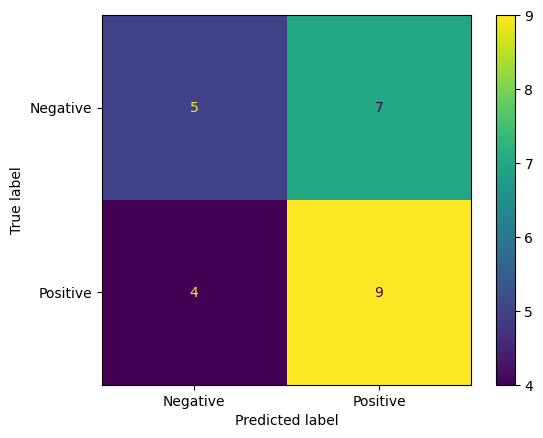

In [21]:
metrics.plot_confusion_matrix(classifier_svm, x_test, y_test, display_labels=['Negative', 'Positive'])

In [22]:
FP, FN,TP,TN = cm1.ravel()
Recall = TP/(TP + FN)
recall_sensitivity = TP/(TP + FN)
recall_specificity = TN/(TN + FP)
print("Recall :",Recall)
print("Recall_sensitivity :",recall_sensitivity)
print("Recall_specificity :",recall_specificity)

Recall : 0.36363636363636365
Recall_sensitivity : 0.36363636363636365
Recall_specificity : 0.6428571428571429


In [23]:
m=classification_report(y_test,y_pred_svm)
print(m)

              precision    recall  f1-score   support

           0       0.56      0.42      0.48        12
           1       0.56      0.69      0.62        13

    accuracy                           0.56        25
   macro avg       0.56      0.55      0.55        25
weighted avg       0.56      0.56      0.55        25



In [24]:
import math
math.sqrt(len(y_test))

5.0

In [25]:
from sklearn.neighbors import KNeighborsClassifier  
classifier_knn =  KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2,weights
= 'distance',algorithm = 'brute')  
classifier_knn.fit(x_train, y_train)  
y_pred_knn= classifier_knn.predict(x_test)  

In [26]:
accuracy = metrics.accuracy_score(y_test, y_pred_knn)
accuracy 

0.56

In [27]:
y1_pred= classifier_knn.predict(features)  
if y1_pred == 0:
    print("With helmet")
else:
    print("Without helmet")

Without helmet


In [28]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred_knn)

0.5599999999999999

In [29]:
cm2= confusion_matrix(y_test, y_pred_knn) 
cm2= np.asarray(cm2)
cm2

array([[7, 5],
       [6, 7]], dtype=int64)

In [30]:
m=classification_report(y_test,y_pred_knn)
print(m)

              precision    recall  f1-score   support

           0       0.54      0.58      0.56        12
           1       0.58      0.54      0.56        13

    accuracy                           0.56        25
   macro avg       0.56      0.56      0.56        25
weighted avg       0.56      0.56      0.56        25



C:\Users\user\anaconda3\envs\user\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


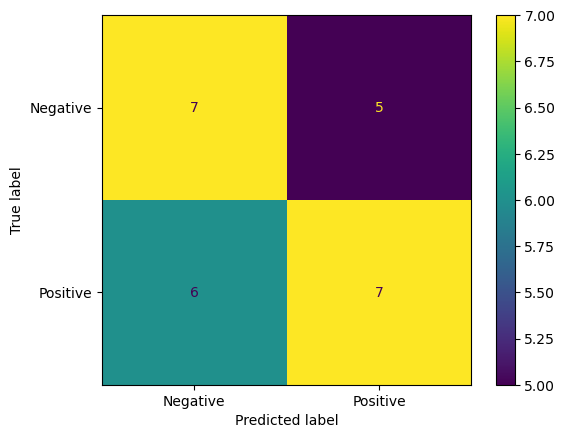

In [31]:
metrics.plot_confusion_matrix(classifier_knn, x_test, y_test, display_labels=['Negative', 'Positive'])

In [32]:
FP = cm2[0][1]
FN = cm2[1][0]
TP = cm2[1][1]
TN = cm2[0][0]
Recall = TP/(TP + FN)
recall_sensitivity = TP/(TP + FN)
recall_specificity = TN/(TN + FP)
print("Recall :",Recall)
print("Recall_sensitivity :",recall_sensitivity)
print("Recall_specificity :",recall_specificity)

Recall : 0.5384615384615384
Recall_sensitivity : 0.5384615384615384
Recall_specificity : 0.5833333333333334


In [33]:
from sklearn.ensemble import RandomForestClassifier
randclassi=RandomForestClassifier(criterion='gini',max_features='sqrt',n_jobs=2)
randclassi.fit(x_train, y_train)
y_pred_ranfor=randclassi.predict(x_test)
y_pred_ranfor

array([0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1])

In [34]:
accuracy = metrics.accuracy_score(y_test, y_pred_ranfor)
accuracy 

0.56

In [35]:
y1_pred= randclassi.predict(features)  
if y1_pred == 0:
    print("With helmet")
else:
    print("Without helmet")

Without helmet


In [36]:
cm3= confusion_matrix(y_test, y_pred_ranfor) 
cm3= np.asarray(cm3)
cm3

array([[7, 5],
       [6, 7]], dtype=int64)

In [37]:
m=classification_report(y_test,y_pred_ranfor)
print(m)

              precision    recall  f1-score   support

           0       0.54      0.58      0.56        12
           1       0.58      0.54      0.56        13

    accuracy                           0.56        25
   macro avg       0.56      0.56      0.56        25
weighted avg       0.56      0.56      0.56        25



C:\Users\user\anaconda3\envs\user\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


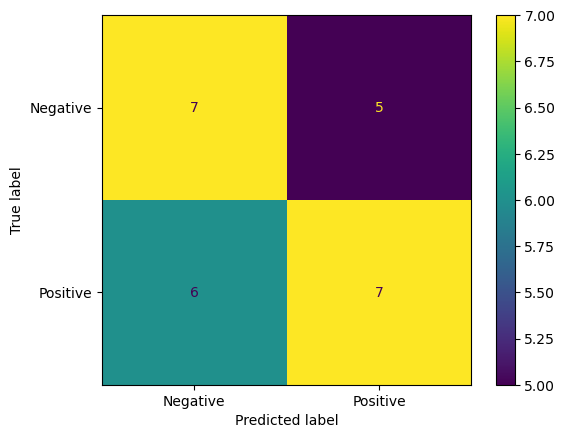

In [38]:
metrics.plot_confusion_matrix(randclassi, x_test, y_test, display_labels=['Negative', 'Positive'])

In [39]:
FP = cm3[0][1]
FN = cm3[1][0]
TP = cm3[1][1]
TN = cm3[0][0]
Recall = TP/(TP + FN)
recall_sensitivity = TP/(TP + FN)
recall_specificity = TN/(TN + FP)
print("Recall :",Recall)
print("Recall_sensitivity :",recall_sensitivity)
print("Recall_specificity :",recall_specificity)

Recall : 0.5384615384615384
Recall_sensitivity : 0.5384615384615384
Recall_specificity : 0.5833333333333334


In [40]:
from sklearn.naive_bayes import GaussianNB
classifier_gauss = GaussianNB()
classifier_gauss.fit(x_train, y_train)
y_pred_gauss=classifier_gauss.predict(x_test)
y_pred_gauss

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1])

In [41]:
accuracy = metrics.accuracy_score(y_test, y_pred_gauss)
accuracy 

0.56

In [42]:
y1_pred= classifier_gauss.predict(features)  
if y1_pred == 0:
    print("With helmet")
else:
    print("Without helmet")

Without helmet


In [43]:
cm4= confusion_matrix(y_test, y_pred_gauss) 
cm4= np.asarray(cm4)
cm4

array([[ 4,  8],
       [ 3, 10]], dtype=int64)

In [44]:
m=classification_report(y_test,y_pred_gauss)
print(m)

              precision    recall  f1-score   support

           0       0.57      0.33      0.42        12
           1       0.56      0.77      0.65        13

    accuracy                           0.56        25
   macro avg       0.56      0.55      0.53        25
weighted avg       0.56      0.56      0.54        25



C:\Users\user\anaconda3\envs\user\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


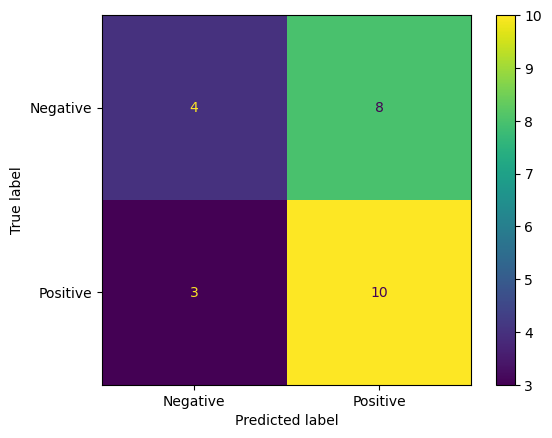

In [45]:
metrics.plot_confusion_matrix(classifier_gauss, x_test, y_test, display_labels=['Negative', 'Positive'])

In [46]:
FP = cm4[0][1]
FN = cm4[1][0]
TP = cm4[1][1]
TN = cm4[0][0]
Recall = TP/(TP + FN)
recall_sensitivity = TP/(TP + FN)
recall_specificity = TN/(TN + FP)
print("Recall :",Recall)
print("Recall_sensitivity :",recall_sensitivity)
print("Recall_specificity :",recall_specificity)

Recall : 0.7692307692307693
Recall_sensitivity : 0.7692307692307693
Recall_specificity : 0.3333333333333333


In [70]:
from sklearn.tree import DecisionTreeClassifier
classifier_dtree = DecisionTreeClassifier(criterion='entropy')
classifier_dtree.fit(x_train, y_train)
y_pred_dtree=classifier_dtree.predict(x_test)
y_pred_dtree

array([0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0])

In [71]:
y1_pred= classifier_dtree.predict(features)  
if y1_pred == 0:
    print("With helmet")
else:
    print("Without helmet")

Without helmet


In [72]:
accuracy = metrics.accuracy_score(y_test, y_pred_dtree)
accuracy 

0.52

In [65]:
cm6= confusion_matrix(y_test, y_pred_dtree)
cm6= np.asarray(cm6)
cm6

array([[6, 6],
       [6, 7]], dtype=int64)

In [66]:
m=classification_report(y_test,y_pred_dtree)
print(m)

              precision    recall  f1-score   support

           0       0.50      0.50      0.50        12
           1       0.54      0.54      0.54        13

    accuracy                           0.52        25
   macro avg       0.52      0.52      0.52        25
weighted avg       0.52      0.52      0.52        25



C:\Users\user\anaconda3\envs\user\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


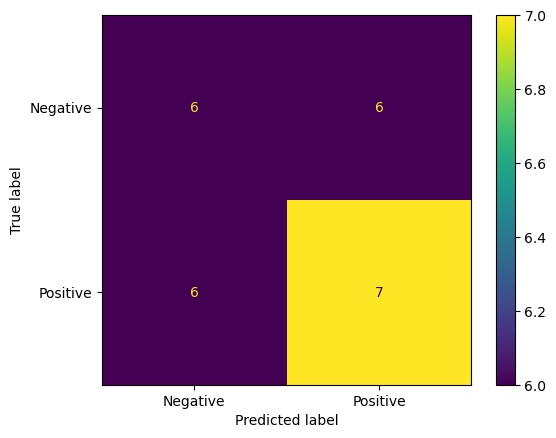

In [67]:
metrics.plot_confusion_matrix(classifier_dtree, x_test, y_test, display_labels=['Negative', 'Positive'])

In [68]:
FP = cm6[0][1]
FN = cm6[1][0]
TP = cm6[1][1]
TN = cm6[0][0]
Recall = TP/(TP + FN)
recall_sensitivity = TP/(TP + FN)
recall_specificity = TN/(TN + FP)
print("Recall :",Recall)
print("Recall_sensitivity :",recall_sensitivity)
print("Recall_specificity :",recall_specificity)

Recall : 0.5384615384615384
Recall_sensitivity : 0.5384615384615384
Recall_specificity : 0.5


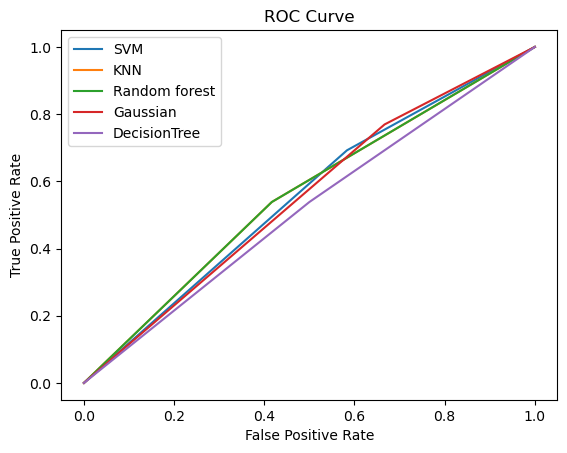

In [69]:
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred_svm)
plt.plot(fpr1, tpr1, label = 'SVM')
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred_knn)
plt.plot(fpr2, tpr2, label = 'KNN' )
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_pred_ranfor)
plt.plot(fpr3, tpr3, label='Random forest')
fpr4, tpr4, thresholds4 = roc_curve(y_test, y_pred_gauss)
plt.plot(fpr4, tpr4, label='Gaussian')
fpr6, tpr6, thresholds6 = roc_curve(y_test, y_pred_dtree)
plt.plot(fpr6, tpr6, label='DecisionTree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()